# Step 1: Load the Data

In [1]:
import pandas as pd

df = pd.read_csv('data/zillow_data.csv')

In [2]:
df.shape

(14723, 272)

# Step 2: Data Preprocessing

In [3]:
melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])

In [4]:
melted

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
3901591,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
3901592,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0
3901593,81225,93733,14722,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0


In [5]:
melted = melted.rename(columns={'RegionName': 'ZipCode'})
melted = melted.drop('RegionID', axis=1)
melted.set_index('time', inplace=True)
melted['ZipCode'] = melted['ZipCode'].map("{:05}".format)

In [6]:
melted

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,77300.0
...,...,...,...,...,...,...,...
2018-04-01,01338,14719,Ashfield,MA,Greenfield Town,Franklin,209300.0
2018-04-01,03293,14720,Woodstock,NH,Claremont,Grafton,225800.0
2018-04-01,40404,14721,Berea,KY,Richmond,Madison,133400.0


# Step 3: EDA and Visualization

In [7]:
df['five_year'] = ((df['2018-04'] - df['2013-04']) / df['2013-04']) * 100
df['ten_year'] = ((df['2018-04'] - df['2008-04']) / df['2008-04']) * 100
df['fifteen_year'] = ((df['2018-04'] - df['2003-04']) / df['2003-04']) * 100

In [8]:
df.sort_values(by='five_year', ascending=False).head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year,ten_year,fifteen_year
7302,93292,80216,Denver,CO,Denver,Denver,7303,NaN,NaN,NaN,...,247600,249100,251200,253800,258100,263700,267300,173.872951,NaN,NaN
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,521100,526700,535800,546900,555000,562000,566700,167.943262,45.158811,100.815025
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,68700,69700,71000,72300,73500,75300,76800,161.224490,-22.891566,-33.621435
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,346700,351200,357100,362500,366900,371600,376100,159.379310,23.676422,39.658374
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,162500,165300,167100,168200,171100,175100,177300,159.210526,24.421053,89.828694
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,211100,214500,217200,219300,221500,224300,226500,155.932203,116.746411,178.940887
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,200400,202600,206000,209600,211600,213300,215600,153.647059,12.291667,75.856444
6563,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564,34400.0,34600.0,34700.0,...,167600,169000,170400,171400,173900,179700,185200,147.593583,166.474820,313.392857
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1567700,1559700,1545700,1540200,1553600,1578400,1598700,147.591761,122.226856,446.190639
1835,74238,37207,Nashville,TN,Nashville,Davidson,1836,63600.0,63600.0,63600.0,...,186700,188000,189500,191400,193900,197600,200800,146.683047,93.635487,137.633136


In [9]:
df_94590 = melted[melted['ZipCode'] == '94590']
df_94590

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,94590,1240,Vallejo,CA,Vallejo,Solano,108200.0
1996-05-01,94590,1240,Vallejo,CA,Vallejo,Solano,107800.0
1996-06-01,94590,1240,Vallejo,CA,Vallejo,Solano,107500.0
1996-07-01,94590,1240,Vallejo,CA,Vallejo,Solano,107300.0
1996-08-01,94590,1240,Vallejo,CA,Vallejo,Solano,107100.0
...,...,...,...,...,...,...,...
2017-12-01,94590,1240,Vallejo,CA,Vallejo,Solano,357100.0
2018-01-01,94590,1240,Vallejo,CA,Vallejo,Solano,362500.0
2018-02-01,94590,1240,Vallejo,CA,Vallejo,Solano,366900.0


In [10]:
df_94590 = df_94590['value']
df_94590

time
1996-04-01    108200.0
1996-05-01    107800.0
1996-06-01    107500.0
1996-07-01    107300.0
1996-08-01    107100.0
                ...   
2017-12-01    357100.0
2018-01-01    362500.0
2018-02-01    366900.0
2018-03-01    371600.0
2018-04-01    376100.0
Name: value, Length: 265, dtype: float64

<AxesSubplot:xlabel='time'>

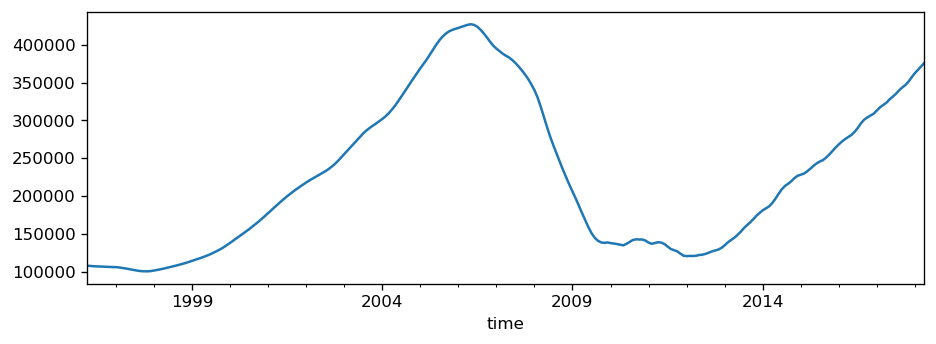

In [21]:
df_94590.plot()

In [27]:
df_94590_diff = df_94590.diff().dropna()
df_94590_diff

time
1996-05-01    -400.0
1996-06-01    -300.0
1996-07-01    -200.0
1996-08-01    -200.0
1996-09-01    -200.0
               ...  
2017-12-01    5900.0
2018-01-01    5400.0
2018-02-01    4400.0
2018-03-01    4700.0
2018-04-01    4500.0
Name: value, Length: 264, dtype: float64

In [28]:
df_94590_2diff = df_94590.diff().diff().dropna()
df_94590_2diff

time
1996-06-01     100.0
1996-07-01     100.0
1996-08-01       0.0
1996-09-01       0.0
1996-10-01     100.0
               ...  
2017-12-01    1400.0
2018-01-01    -500.0
2018-02-01   -1000.0
2018-03-01     300.0
2018-04-01    -200.0
Name: value, Length: 263, dtype: float64

In [11]:
# find the index which allows us to split off 20% of the data
# cutoff = '2017-04-01' #cut off point at 80% of the data
# cutoff

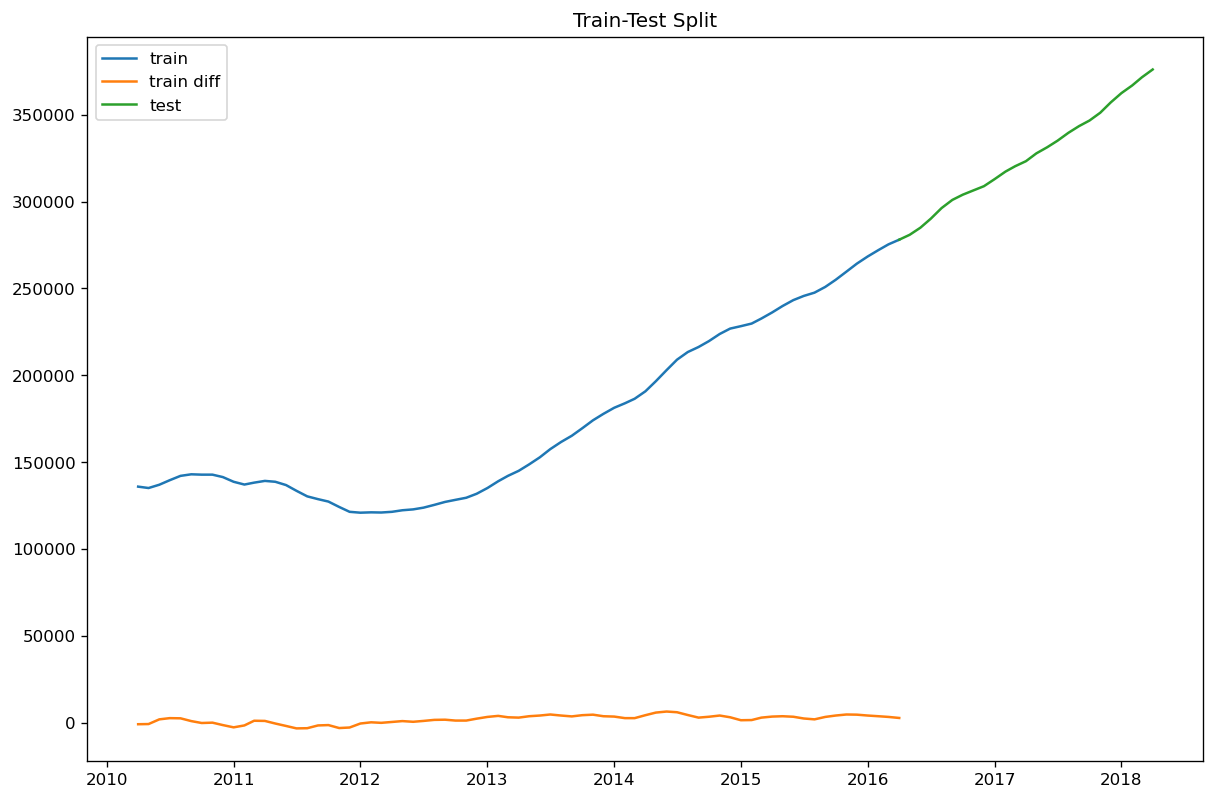

In [30]:
from matplotlib import pyplot as plt

# Define train and test sets according to the index found above
train = df_94590['2010-04-01':'2016-04-01'] #before cut off is train set -- 75%
train_diff = df_94590_diff['2010-04-01':'2016-04-01']
train_2diff = df_94590_2diff['2010-04-01':'2016-04-01']

test = df_94590['2016-04-01':] #after cut off is the test set --25%
test_diff = df_94590_diff['2016-04-01':]
test_2diff = df_94590_2diff['2016-04-01':]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(train_diff, label='train diff')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [25]:
train

time
2010-04-01    135900.0
2010-05-01    135100.0
2010-06-01    137000.0
2010-07-01    139600.0
2010-08-01    142100.0
                ...   
2015-12-01    264300.0
2016-01-01    268400.0
2016-02-01    272100.0
2016-03-01    275400.0
2016-04-01    278100.0
Name: value, Length: 73, dtype: float64

In [13]:
# Data Library
import numpy as np

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt(df_94590.diff());

plt_pacf(df_94590.diff().dropna())

plt.show();

TypeError: 'module' object is not callable

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model = ARIMA(train, order=(1, 0, 2)).fit()
model_diff = ARIMA(train_diff, order=(1, 0, 2)).fit()
model_2diff = ARIMA(train_2diff, order=(1, 0, 2)).fit()

C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\pschu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: 

In [33]:
y_pred = model.predict(start = test.index[0], end = test.index[-1])
y_pred_diff = model_diff.predict(start = test_diff.index[0], end = test_diff.index[-1])
y_pred_2diff = model_2diff.predict(start = test_2diff.index[0], end = test_2diff.index[-1])

In [42]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df_94590)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.628365
p-value: 0.087275


In [43]:
result = adfuller(df_94590_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.020888
p-value: 0.277490


In [44]:
result = adfuller(df_94590_2diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.439240
p-value: 0.000253


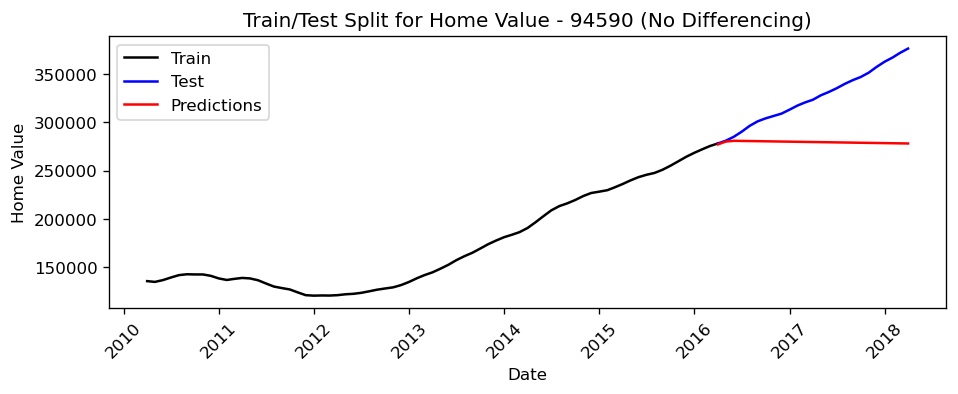

In [35]:
# Plot
plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "blue",label='Test')
plt.ylabel('Home Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Home Value - 94590 (No Differencing)")
plt.plot(y_pred, color='red', label = 'Predictions')
plt.legend();

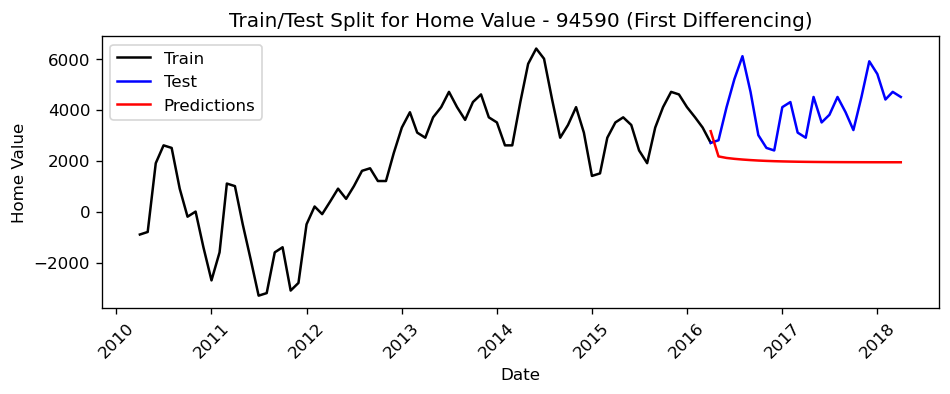

In [37]:
# Plot
plt.plot(train_diff, color = "black",label='Train')
plt.plot(test_diff, color = "blue",label='Test')
plt.ylabel('Home Value (First Differencing)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Home Value - 94590 (First Differencing)")
plt.plot(y_pred_diff, color='red', label = 'Predictions')
plt.legend();

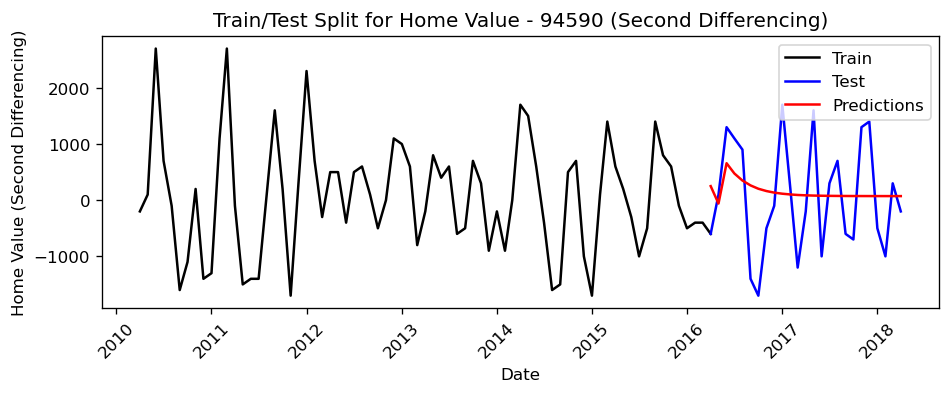

In [40]:
# Plot
plt.plot(train_2diff, color = "black",label='Train')
plt.plot(test_2diff, color = "blue",label='Test')
plt.ylabel('Home Value (Second Differencing)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Home Value - 94590 (Second Differencing)")
plt.plot(y_pred_2diff, color='red', label = 'Predictions')
plt.legend();